### Mathematical transformation
- we can apply different mathematical function to the column 

## sklearn have 3 types of transformars

### 1. function transformars
- log transfrom
- reciprocal transform
- power transform - square and square root
- custom transformation - apply mathmatical function like x^2 + 2x

### 2. Power transformars
- Box-cox
- yeo-johnson

### 3. Quantile transformar - no need
- use case
- converts your data into normal distribuation
- imp - calculations makes easy, problem solving easy
- maching learning - linear regression, logistic reggression, work far better on normal distribution data, some ML algo work better on normal data, so we can to convert data into normal distribution.

### How to find data have normal distibution or not
- plot distplot or kde
- pd.skew() function result is 0 means normal dist
- QQ plot - if line is linear with 45 angle means data have normal distributes


### 1. Log Transform
- log to the base 10 or 2 of values, so its converts closely normaly distributes
#### use
- not use on - negative values
- use on right skewed data means positive skewed
- log is convets additive scale to multiple scale - ex. 10,100,1000, converts into equally distance

### 2. Reciprocal (1/x) Transform
- its converts big values to lower values and lower values to big values

### 3. Square Transfrom (X^2)
- use on left skewed data - negativesly skewd data
### 4 . square root - no need 


In [22]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [12]:
X = df.iloc[:,[1,2]]
y = df['Survived']

In [15]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [16]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
x_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age QQ plot')

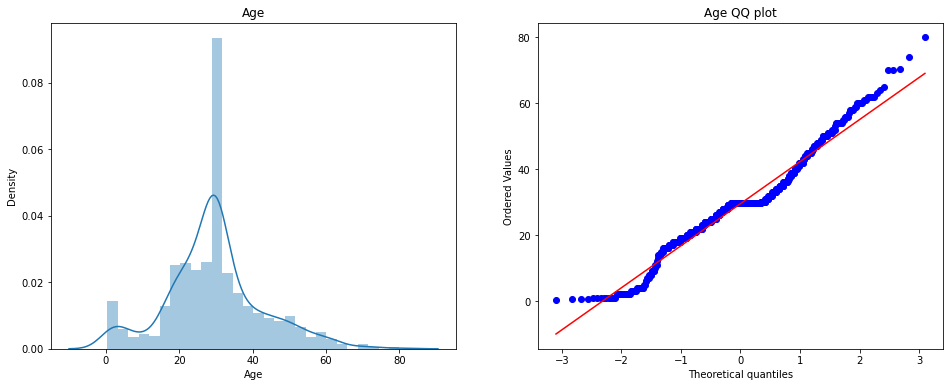

In [20]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare QQ plot')

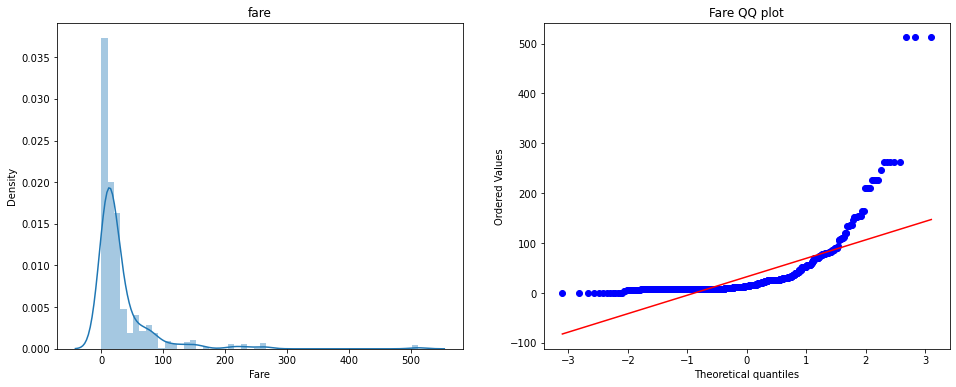

In [21]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('fare')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')

In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [26]:
clf.fit(x_train,y_train)
y_pred1 = clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.6480446927374302

In [27]:
clf2.fit(x_train,y_train)
y_pred2 = clf2.predict(x_test)
accuracy_score(y_test,y_pred2)

0.659217877094972

In [29]:
trf = FunctionTransformer(func=np.log1p)
# log apply simply log
# log1p add 1 in every values

In [31]:
x_train_transform = trf.fit_transform(x_train)

In [32]:
x_test_transform = trf.transform(x_test)

In [33]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [34]:
clf1.fit(x_train_transform,y_train)
clf2.fit(x_train_transform,y_train)

y_pre1 = clf1.predict(x_test_transform)
y_pre2 = clf2.predict(x_test_transform)

In [35]:
# logistic
accuracy_score(y_test,y_pre1)

0.6815642458100558

In [36]:
# decission 
accuracy_score(y_test,y_pre2)

0.664804469273743

In [38]:
# check cross validation
x_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier() 

print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10))

LR 0.678027465667915
DT 0.6622097378277153


### Power Transformars

 ### Box-cox transform
 - The exponent here is variable called lamda that varies over the range of -5 to 5 and the process of searching, we examine all values of lambda. finally,we choose optimal value(resulting in the best approximation on a normal distribution) for your variable
 
 - farmula - x^lambda = x^lambda - 1/ lambda  log(x)
 - lambda will be - x2,x3,x1.5
 - important - strictly applicatble number >0 or not applicable on negative

### Yeo-Johnson Transform
- This transform is somewhat of an adjustment to the Box-cox transformation, by which we can apply it to negative numbers

In [43]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [44]:
df = pd.read_csv('concrete_data.csv')

In [45]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<AxesSubplot:xlabel='Water', ylabel='Density'>

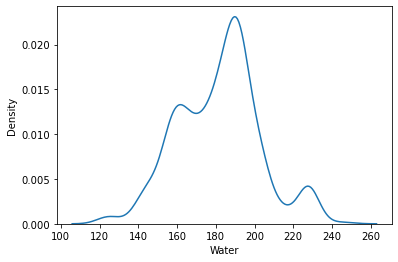

In [57]:
sns.kdeplot(df['Water'])

In [58]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [59]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [61]:
x = df.drop(columns='Strength')
y = df.iloc[:,-1]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [63]:
# Applying model without transform

lr = LinearRegression()
lr.fit(X_train,y_train)
y_p = lr.predict(X_test)
r2_score(y_test,y_p)

0.6820838555279262

In [71]:
np.mean(cross_val_score(lr,X_train,y_train, scoring='r2'))

0.5816066355159496

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


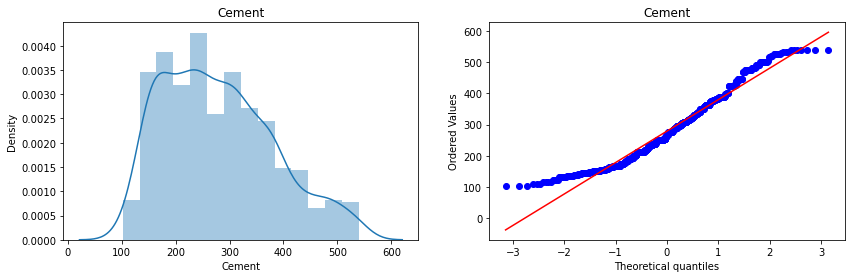

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


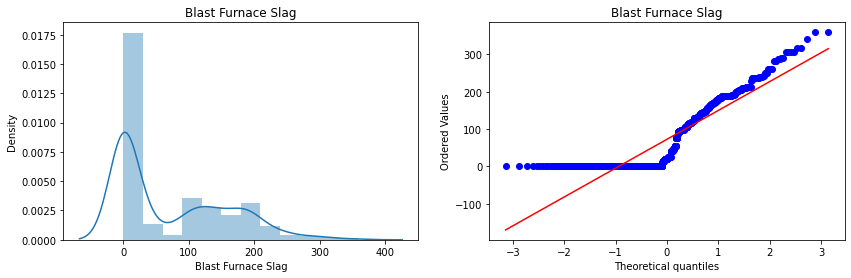

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


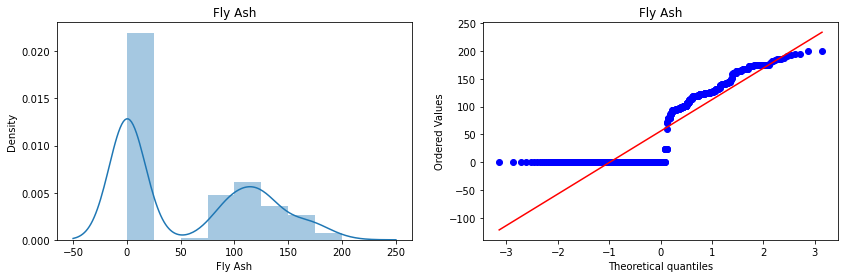

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


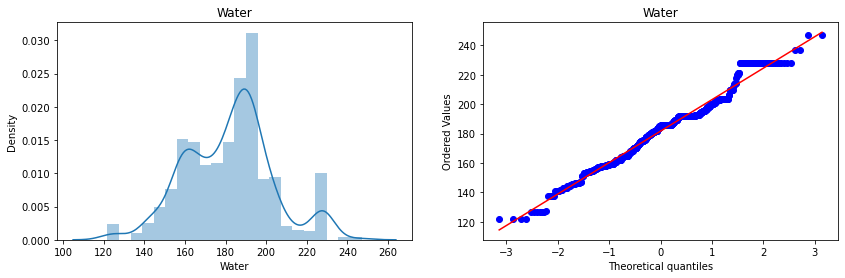

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


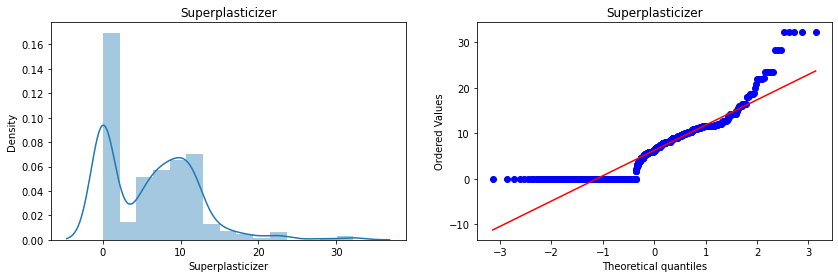

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


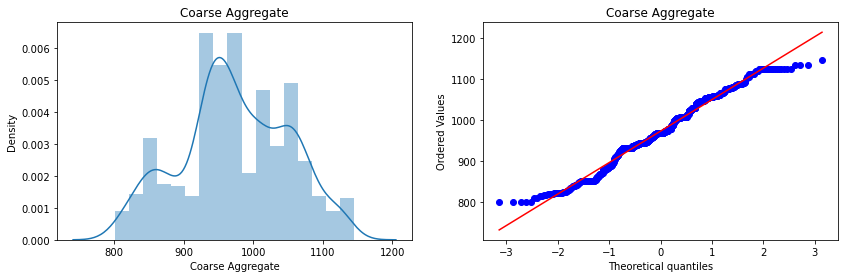

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


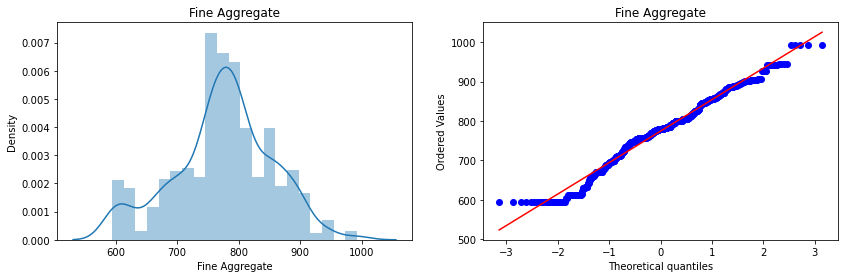

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


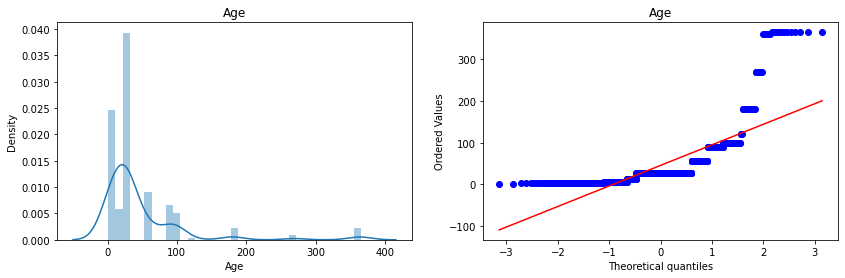

In [70]:
# plotting the distplot without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)
    
    plt.show()

In [72]:
 # applying box-cox transform
    
pt = PowerTransformer(method='box-cox')
X_train_transfrom = pt.fit_transform(X_train+0.00001)
X_test_transfrom = pt.transform(X_test+0.00001)

In [73]:
Lr = LinearRegression()
Lr.fit(X_train_transfrom,y_train)
y_pr = Lr.predict(X_test_transfrom)
r2_score(y_test,y_pr)

0.8112442849359415

In [79]:
# cross validation
cross_val_score(Lr,X_train_transfrom,y_train,scoring='r2',cv=20).mean()

0.7848123577203973

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

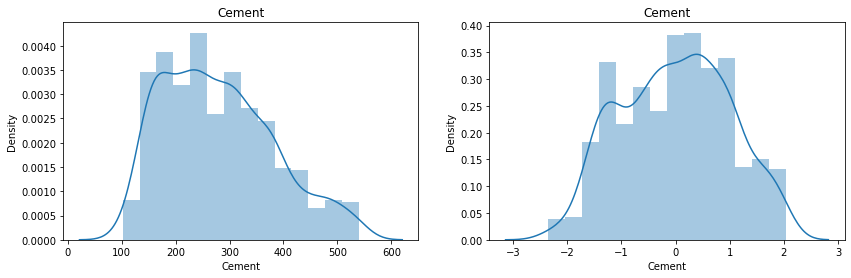

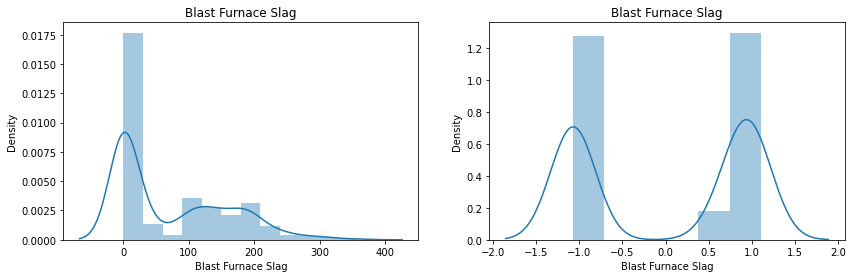

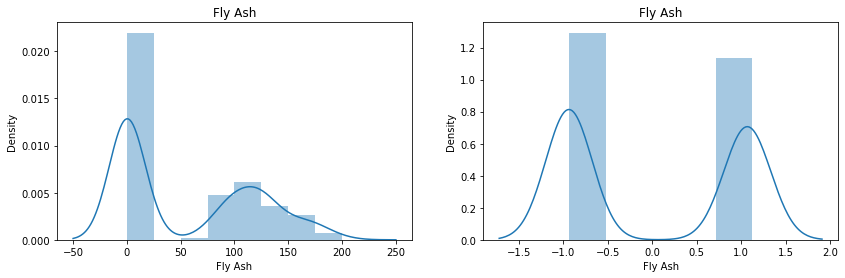

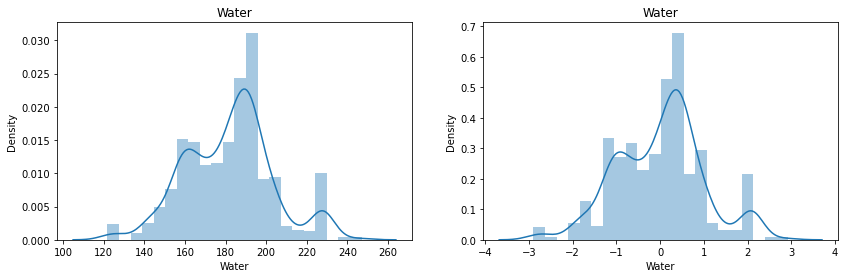

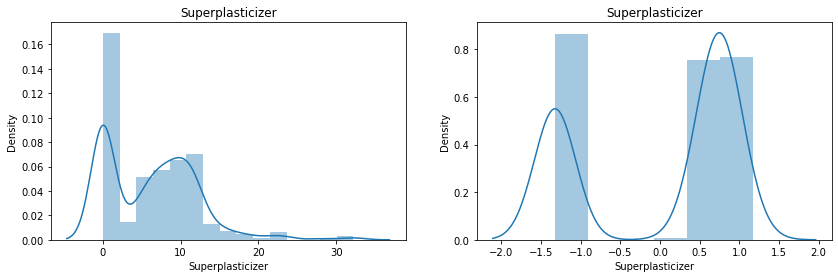

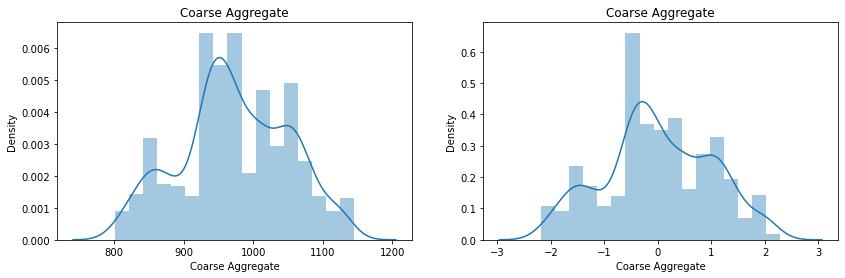

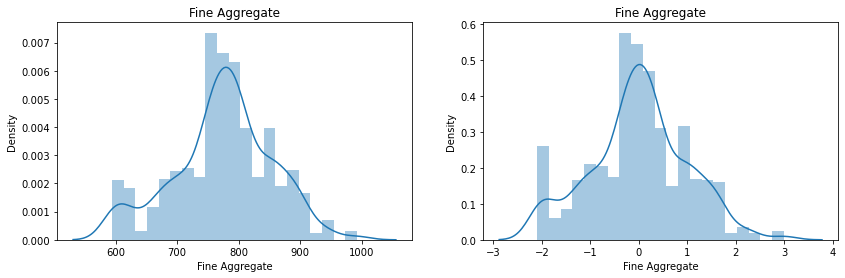

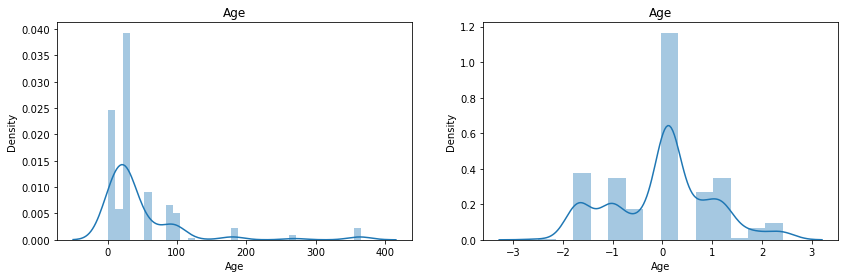

In [85]:
X_train_transform=pd.DataFrame(X_train_transfrom,columns=X_train.columns)
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(X_train_transform[col])
    plt.title(col)
    
    plt.show

In [86]:
# applying yeo-johnson transform
pt1 = PowerTransformer()
X_train_trans2 = pt1.fit_transform(X_train)
X_test_trans2 = pt1.transform(X_test)

In [88]:
LinREg = LinearRegression()
LinREg.fit(X_train_trans2,y_train)
ypred = LinREg.predict(X_test_trans2)
r2_score(y_test,ypred)

0.8143230251348241

In [93]:
# cross validation
cross_val_score(LinREg,X_train_trans2,y_train,scoring='r2',cv=10).mean()

0.7928447641290559

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

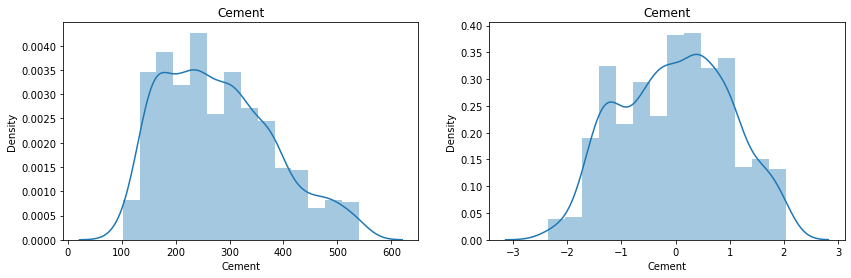

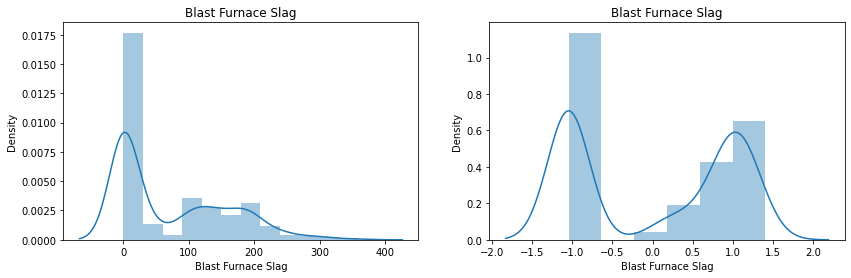

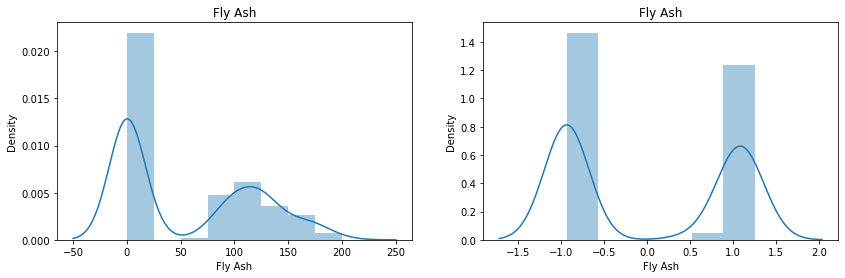

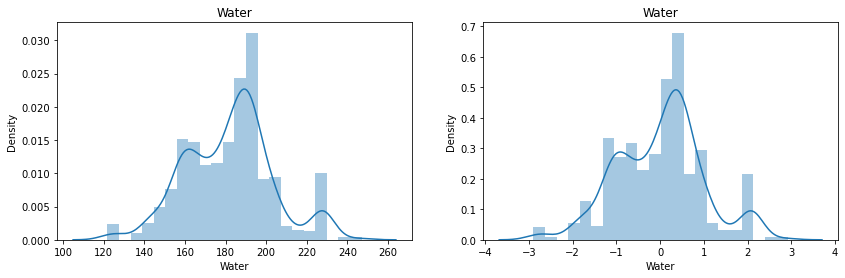

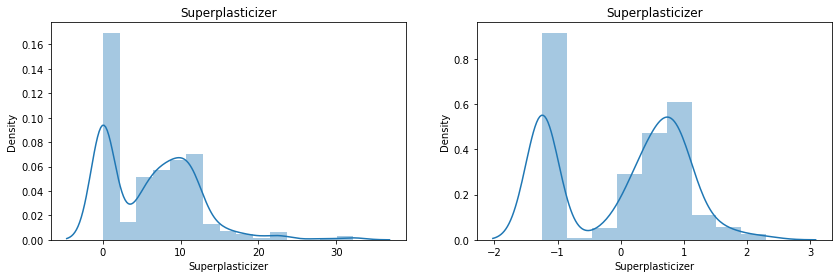

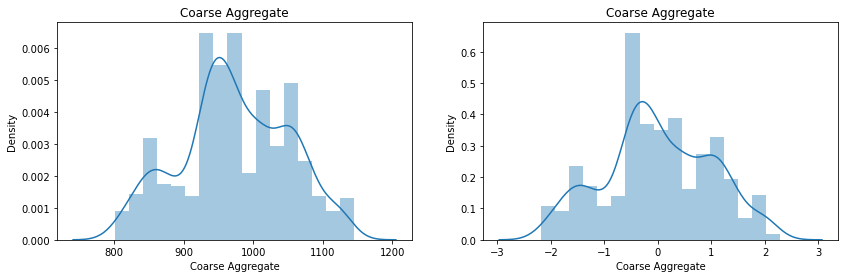

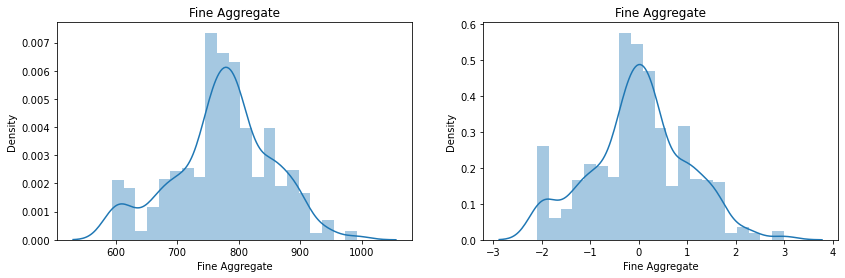

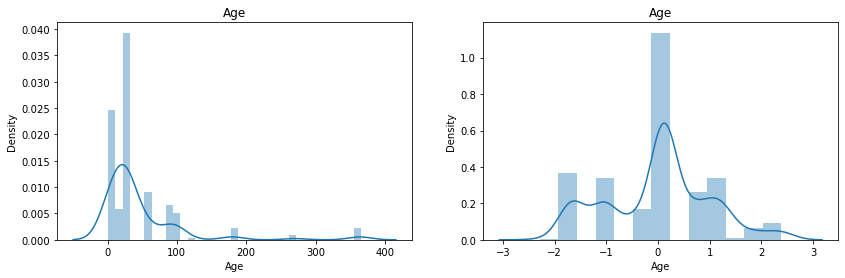

In [95]:
X_train_trans=pd.DataFrame(X_train_trans2,columns=X_train.columns)
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(X_train_trans[col])
    plt.title(col)
    
    plt.show

## Binning and Binarization

### Encoding Numerical Features
- why need to encoding numerical column?
- use - examaple
- data - google playstore,
- no of downloads - 50, 1000000, 4003, 35000,---,400
- converts into bins(category) - 100+ downloads, 1000+ download, 100k+ downloads, 1000k+ downloads

### Two techinque for encoding numerical features
- Discretization(Binning)
- Binnarization

### Discretization
- Descretization is the process of transforming continuous variables into descrete variable by creating a set of contiguous intervals that span the range of the variables values. Descretization is also called binning. Where bin is an alternative name of interval

### why use Descretization:
- 1. To Handle Outliers 
- 2. To improve the value spread

### Types of Descretization
- 1.Unsupervised
     - Equal width(uniform)
     - Equal frequency(quantile)
     - k means (binning)
- 2.Supervised
    - DecissionTreeBinning
- 3.custom

### Equal width
- ex- age = 24,56,12,52,67,91,27
- bins = 10  specify bins how much do you want
- farmula - (Max - min)/ bins    for example age max 100 and min 0 , (100-0)/10 = 10
- bins created = 0-10,10-20,20-30,----,90-100, all bins have equal width 10
- advantages - handle outliers

### Equal Frequency
- intervals = 10 specify by user
- Each interval contains 10% of total observations
- ex. start from 0 to that values where 10% percentile values (1st interval) - 0-16 
- next time 16-20 , 20 its 20% percentile values (2nd interval) 16-20
- so you create 10 quanitle

- advantage - handle outliers, and improves values spread uniform, 

### K means Binning
- clustering creates - in nth dimensions data
- intervals(centroid) = 5 , randomly create centroid (place)
- distance measure of every values from centroid and form clusters with closes centroid
- usecase - when values have in clusters


### Encoding the descretized variable
- There is one class in sklearn library which is KBinsDescretizer()
- three parameter - 1st bins, 2nd strategy(uniform,quantile,k-means), 3rd Encoding(ordinal, onehotencoding)

In [1]:
# Example

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(714, 3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

In [10]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [12]:
y_train.head()

328    1
73     0
253    0
719    0
666    0
Name: Survived, dtype: int64

In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6153846153846154

In [17]:
cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy').mean()

0.6270114942528735

In [18]:
# create object of Kbins
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_Fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [19]:
trf = ColumnTransformer([
    ('step1',kbin_age,[0]),
    ('step2',kbin_Fare,[1])
])

In [20]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

In [23]:
trf.named_transformers_['step1'].n_bins_

array([10])

In [25]:
trf.named_transformers_['step2'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [26]:
output = pd.DataFrame({'age':X_train['Age'],
                      'age_trf':X_train_transform[:,0],
                      'fare':X_train['Fare'],
                      'fare_trf':X_train_transform[:,1]})

In [28]:
output.sample(10)

,age,age_trf,fare,fare_trf
122,32.5,6.0,30.0708,7.0
777,5.0,0.0,12.4750,3.0
887,19.0,2.0,30.0000,7.0
659,58.0,9.0,113.2750,9.0
27,19.0,2.0,263.0000,9.0
597,49.0,8.0,0.0000,0.0
439,31.0,5.0,10.5000,3.0
197,42.0,8.0,8.4042,2.0
488,30.0,5.0,8.0500,2.0
16,2.0,0.0,29.1250,7.0


In [29]:
# lets check model

clf = DecisionTreeClassifier()
clf.fit(X_train_transform,y_train)
y_pred = clf.predict(X_test_transform)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [32]:
# cross val score
cross_val_score(clf,X_train_transform,y_train,cv=10,scoring='accuracy').mean()

0.6777979431336962

In [38]:
# using euqal width
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='uniform')
kbin_Fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='un')

trf = ColumnTransformer([
    ('step1',kbin_age,[0]),
    ('step2',kbin_Fare,[1])
])

X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train_transform,y_train)
y_pred = clf.predict(X_test_transform)
accuracy_score(y_test,y_pred)

0.6363636363636364

## Custom Binning
- creates bins using your domain knowledge
- exmaple - age 
- [0-18] = kids
- [18-60] = adults
- [60- 80 ] =old
- you have to create custom binning using your logic with pandas, there is no library for custom binning


## Binarization
- its a special case of descreatization
- In binarization you conrverts continuous value(numerical) to binary value

- use case - image processing
- l